<a href="https://colab.research.google.com/github/sewasewT7/Supervised-ML-Project/blob/main/Dog_vs_Cat_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
pip install kaggle

In [7]:
#configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [9]:
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [10]:
!kaggle competitions download -c dogs-vs-cats

dogs-vs-cats.zip: Skipping, found more recently modified local copy (use --force to force download)


In [11]:
!ls

 dogs-vs-cats.zip   kaggle.json   sampleSubmission.csv	 train
'Image Resized'     sample_data   test1.zip		 train.zip


In [13]:
#extracting the compressed dataset
from zipfile import ZipFile

dataset = 'dogs-vs-cats.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("extracted")

extracted


In [14]:
#extracting the compressed dataset for train file
from zipfile import ZipFile

dataset = '/content/train.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('Extracted')


Extracted


In [15]:
import os
#counting the number of the file in the train folder
path, dirs, files = next(os.walk('/content/train'))
file_count = len(files)
print('number of images:', file_count )

number of images: 25000


In [16]:
file_names = os.listdir('/content/train')
print(file_names)

['cat.1293.jpg', 'dog.4072.jpg', 'dog.11838.jpg', 'dog.9837.jpg', 'cat.2412.jpg', 'cat.5465.jpg', 'dog.8055.jpg', 'dog.12378.jpg', 'dog.2126.jpg', 'cat.10803.jpg', 'cat.12095.jpg', 'cat.7907.jpg', 'dog.950.jpg', 'dog.349.jpg', 'dog.5310.jpg', 'dog.2071.jpg', 'cat.1967.jpg', 'cat.658.jpg', 'dog.4674.jpg', 'dog.4432.jpg', 'cat.7910.jpg', 'dog.856.jpg', 'cat.6730.jpg', 'dog.185.jpg', 'dog.10908.jpg', 'dog.11256.jpg', 'dog.5683.jpg', 'dog.5903.jpg', 'cat.11329.jpg', 'cat.5761.jpg', 'dog.3114.jpg', 'dog.6775.jpg', 'cat.9464.jpg', 'cat.1634.jpg', 'dog.12328.jpg', 'cat.8720.jpg', 'cat.11960.jpg', 'cat.11245.jpg', 'cat.1149.jpg', 'dog.3244.jpg', 'cat.10245.jpg', 'dog.7141.jpg', 'cat.1819.jpg', 'dog.8562.jpg', 'cat.1179.jpg', 'dog.6246.jpg', 'dog.6033.jpg', 'cat.6204.jpg', 'dog.8991.jpg', 'cat.8669.jpg', 'dog.3243.jpg', 'dog.9063.jpg', 'cat.10650.jpg', 'cat.8044.jpg', 'cat.3442.jpg', 'cat.4500.jpg', 'cat.8958.jpg', 'cat.9806.jpg', 'cat.3568.jpg', 'dog.4831.jpg', 'cat.10689.jpg', 'cat.7384.jpg',

In [17]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

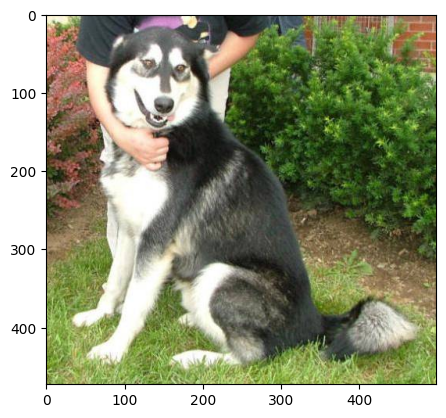

In [18]:
#display dog image
img = mpimg.imread('/content/train/dog.10021.jpg')
imgplt = plt.imshow(img)
plt.show()

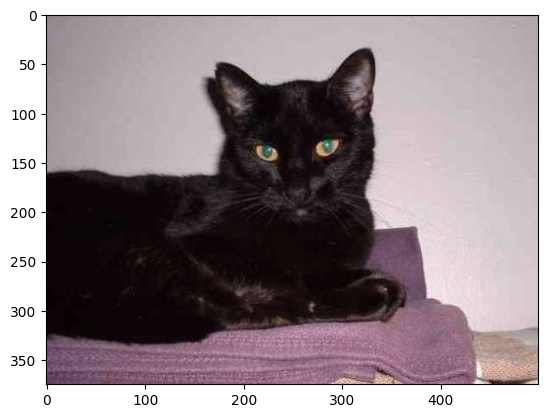

In [19]:
img = mpimg.imread('/content/train/cat.12233.jpg')
imgplt = plt.imshow(img)
plt.show()

In [20]:
file_names = os.listdir('/content/train')

for i in range(5):
  name = file_names[i]
  print(name[0:3])


cat
dog
dog
dog
cat


In [21]:
file_names = os.listdir('/content/train')
dog_count = 0
cat_count = 0

for img_files in file_names:
  name = img_files[0:3]

  if name == 'dog':
    dog_count += 1
  else:
    cat_count += 1
print("number of dogs are: ", dog_count)
print("number of cats are: ", cat_count)


number of dogs are:  12500
number of cats are:  12500


In [16]:
#Creating a directory for resized images
os.mkdir('/content/Image Resized')


In [22]:
original_folder = '/content/train/'
resized_folder = '/content/Image Resized/'

for i in range(2000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder + filename

  img = Image.open(img_path)
  img = img.resize((224,224))
  img = img.convert('RGB')

  newImgpath = resized_folder + filename
  img.save(newImgpath)


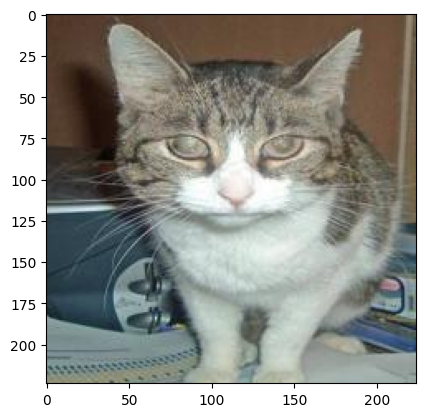

In [23]:
img = mpimg.imread('/content/Image Resized/cat.12095.jpg')
imgplt = plt.imshow(img)
plt.show()

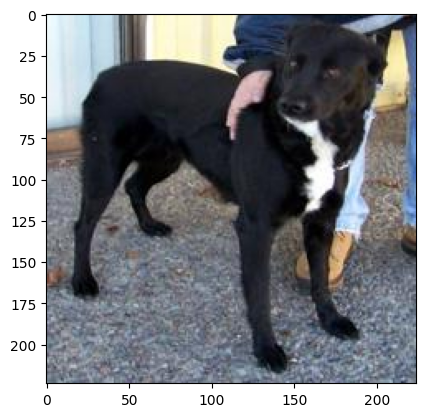

In [24]:
img = mpimg.imread('/content/Image Resized/dog.8055.jpg')
imgplt = plt.imshow(img)
plt.show()

In [25]:
file_names = os.listdir('/content/Image Resized/')

labels = []

for i in range(2000):
  file_name = file_names[i]
  label = file_name[0:3]

  if label == 'dog':
    labels.append(1)
  else:
    labels.append(0)

In [26]:
print(file_names[0:10])
print(labels[0:10])

['cat.1293.jpg', 'dog.4072.jpg', 'dog.11838.jpg', 'dog.9837.jpg', 'cat.2412.jpg', 'cat.5465.jpg', 'dog.8055.jpg', 'dog.12378.jpg', 'dog.2126.jpg', 'cat.10803.jpg']
[0, 1, 1, 1, 0, 0, 1, 1, 1, 0]


In [27]:
import cv2
import glob

In [33]:
image_directory='/content/Image Resized/'
img_extention = ['png', 'jpg']

files = []
#[files.extend(glob.glob(image_directory + '*.' + e)) for e in img_extention]

dog_cat_img = np.asarray([cv2.imread(file)for file in files ])

In [24]:
print(dog_cat_img)

[[[[ 79  70  83]
   [ 69  60  73]
   [ 65  56  69]
   ...
   [115 112 121]
   [ 75  70  79]
   [ 45  41  47]]

  [[ 78  69  82]
   [ 68  59  72]
   [ 64  55  68]
   ...
   [104 100 111]
   [ 70  65  74]
   [ 47  42  51]]

  [[ 76  67  80]
   [ 66  57  70]
   [ 63  54  67]
   ...
   [ 94  89 104]
   [ 64  60  72]
   [ 49  45  57]]

  ...

  [[152 169 155]
   [148 165 151]
   [146 163 149]
   ...
   [162 140 164]
   [161 139 164]
   [163 141 165]]

  [[153 170 156]
   [150 167 153]
   [152 169 155]
   ...
   [105  80 106]
   [108  83 111]
   [114  89 115]]

  [[156 173 159]
   [155 172 158]
   [159 176 162]
   ...
   [ 64  39  67]
   [ 71  46  74]
   [ 80  55  83]]]


 [[[ 91 104  82]
   [ 90 102  82]
   [ 88 100  82]
   ...
   [ 77  68  64]
   [ 78  69  65]
   [ 79  70  66]]

  [[ 87 101  77]
   [ 77  90  68]
   [ 85  97  77]
   ...
   [ 77  68  64]
   [ 78  69  65]
   [ 79  70  66]]

  [[ 87 102  74]
   [ 79  94  67]
   [ 87 101  77]
   ...
   [ 77  68  65]
   [ 76  69  66]
   [ 77  70

In [29]:
X = dog_cat_img
Y = np.asarray(labels)

**bold Train test split**

In [30]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size =0.2, random_state = 2)
X_train_scaled = X_train/255
X_test_scaled = X_test/255
print(X_train_scaled)
print(X_test_scaled)

[[[[0.18039216 0.37254902 0.16862745]
   [0.16078431 0.35294118 0.14901961]
   [0.1372549  0.32941176 0.13333333]
   ...
   [0.44705882 0.50196078 0.47843137]
   [0.40392157 0.45098039 0.42745098]
   [0.36862745 0.41568627 0.39215686]]

  [[0.20392157 0.39607843 0.19215686]
   [0.18823529 0.38039216 0.17647059]
   [0.18039216 0.37254902 0.17647059]
   ...
   [0.42745098 0.48235294 0.45882353]
   [0.35686275 0.40392157 0.38039216]
   [0.31372549 0.36078431 0.3372549 ]]

  [[0.29411765 0.48627451 0.29019608]
   [0.28235294 0.4745098  0.27843137]
   [0.27843137 0.47058824 0.2745098 ]
   ...
   [0.36470588 0.41176471 0.38823529]
   [0.28235294 0.32941176 0.30588235]
   [0.25098039 0.29803922 0.2745098 ]]

  ...

  [[0.17647059 0.25098039 0.18431373]
   [0.18431373 0.25882353 0.19215686]
   [0.18431373 0.26666667 0.20784314]
   ...
   [0.18431373 0.30588235 0.39607843]
   [0.23137255 0.34509804 0.46666667]
   [0.29411765 0.41568627 0.54509804]]

  [[0.18823529 0.2627451  0.18823529]
   [0.1

**Building the neural network**

In [50]:
!pip install tensorflow==2.14 tensorflow-hub==0.15



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.8/489.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 56.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 80.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 23.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.5 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.17.0
    Uninstalling wrapt-1.17.0:
      Successfully uninstalled wrapt-1.17.0
  Attempting uninstall: tensorflow-hub
    Found existing installation: tensorflow-hub 0.16.1
    Uninstalling tensorflow-hub-0.16.1:
      Successfully uninstalled tensorflow-hub-0.16.1
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.

In [1]:
import tensorflow as tf
import tensorflow_hub as hub

print("TensorFlow version:", tf.__version__)
print("TensorFlow Hub version:", hub.__version__)


TensorFlow version: 2.14.0
TensorFlow Hub version: 0.15.0


In [43]:
version_fn = getattr(tf.keras, "version", None)
if version_fn and version_fn().startswith("3."):
  import tf_keras as keras
else:
  keras = tf.keras

In [4]:
mobilenet_url = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_url,input_shape=(224, 224, 3), trainable=False)

In [32]:
model = tf.keras.Sequential([
    pretrained_model,                              # Pretrained feature extractor
    tf.keras.layers.Dense(2, activation='softmax')  # Output layer with 2 classes
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )

# Print the model summary
model.summary()

# Train the model
model.fit(X_train_scaled, Y_train, validation_data=(X_test_scaled, Y_test), epochs=5)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_3 (Dense)             (None, 2)                 2562      
                                                                 
Total params: 2260546 (8.62 MB)
Trainable params: 2562 (10.01 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________
Epoch 1/5
50/50 [==============================] - 90s 2s/step - loss: 0.1770 - accuracy: 0.9350 - val_loss: 0.0743 - val_accuracy: 0.9725
Epoch 2/5
50/50 [==============================] - 83s 2s/step - loss: 0.0629 - accuracy: 0.9787 - val_loss: 0.0635 - val_accuracy: 0.9750
Epoch 3/5
50/50 [==============================] - 87s 2s/step - loss: 0.0445 - accuracy: 0.9831 - val_loss: 0.0614 - val_accuracy: 

In [34]:
score, acc = model.evaluate(X_test_scaled, Y_test)

13/13 [==============================] - 25s 2s/step - loss: 0.0538 - accuracy: 0.9775


In [35]:
print('Test loss = ', score)
print('Test accuracy =',acc)

Test loss =  0.05377112701535225
Test accuracy = 0.9775000214576721


**Predictive Syatem**

path of the image to be predicted/content/dog.jpg


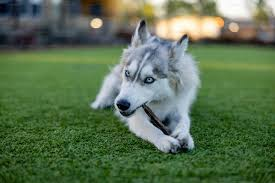

1/1 [==============================] - 4s 4s/step
[[0.11308005 0.88692   ]]
1
The image represents a Dog


In [36]:
input_img_path = input('path of the image to be predicted')

input_img = cv2.imread(input_img_path) #change image to nupyarray
cv2_imshow(input_img)

input_img_resize = cv2.resize(input_img, (224,224))
input_img_scaled = input_img_resize/255
image_reshaped = np.reshape(input_img_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')

Path of the image to be predicted: /content/cat.jpg


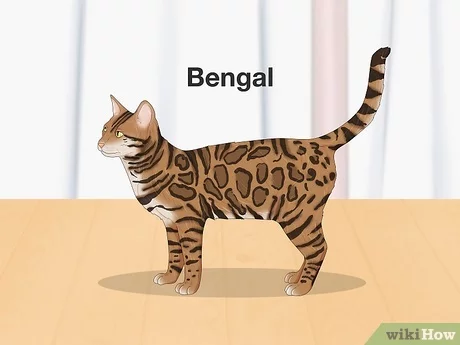

1/1 [==============================] - 0s 60ms/step
[[0.98998207 0.01001797]]
0
The image represents a Cat


In [37]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents a Cat')

else:
  print('The image represents a Dog')